In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
path = "../../Risultati/Chlorine/data_imputation_classification.csv"
df = pd.read_csv(path)
df.head()
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,imputation,r2
0,100,none,none,0.793202
1,100,none,none,0.782348
2,100,none,none,0.791774
3,100,none,none,0.784633
4,100,none,none,0.789203
...,...,...,...,...
175,50,none,none,0.780063
176,50,none,drop,0.783743
177,50,none,LOCF,0.778349
178,50,none,mean,0.783776


In [13]:
df_grouped = df.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                       percentage        r2
outlier imputation                         
none    drop                70.00  0.786427
        mean                70.00  0.784551
        LOCF                70.00  0.783915
        interpolation       70.00  0.783866
        none                73.75  0.782955


In [14]:
df_none = df[(df['imputation'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_none

,percentage,r2
0,50,0.779451
1,60,0.781001
2,70,0.783164
3,80,0.782021
4,90,0.785367
5,100,0.788232


In [15]:
df_drop = df[(df['imputation'] == 'drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_drop

,percentage,r2
0,50,0.788124
1,60,0.786723
2,70,0.787827
3,80,0.784479
4,90,0.784979


In [16]:
df_locf = df[(df['imputation'] == 'LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_locf

,percentage,r2
0,50,0.781858
1,60,0.783164
2,70,0.784878
3,80,0.783572
4,90,0.786102


In [17]:
df_mean = df[(df['imputation'] == 'mean')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_mean

,percentage,r2
0,50,0.784796
1,60,0.783531
2,70,0.782634
3,80,0.785735
4,90,0.786061


In [18]:
df_int = df[(df['imputation'] == 'interpolation')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_int

,percentage,r2
0,50,0.781409
1,60,0.783572
2,70,0.784021
3,80,0.785816
4,90,0.784511


[]

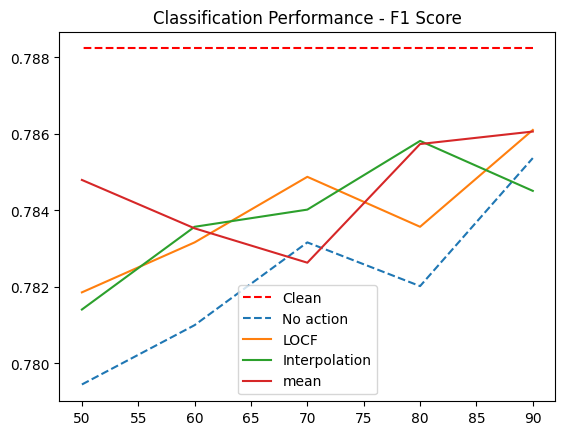

In [19]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['r2'].iloc[:-1], '--', label='No action')
#plt.plot(df_drop['percentage'],df_drop['r2'], label='drop')
plt.plot(df_locf['percentage'],df_locf['r2'], label='LOCF')
plt.plot(df_int['percentage'],df_int['r2'], label='Interpolation')
plt.plot(df_mean['percentage'],df_mean['r2'], label='mean')
plt.title("Classification Performance - F1 Score")
plt.legend()
plt.plot()